In [1]:
import tensorflow_docs.modeling
import tensorflow_docs.plots
import tensorflow_docs as tfdocs
from tensorflow.keras import layers
from tensorflow import keras
import tensorflow as tf
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from tqdm import tqdm
import os
os.environ["PATH"] += os.pathsep + 'D:/Program Files/Graphviz/bin/'


try:
    from tensorflow.keras.utils import plot_model
    import pydot
    pydot.Dot.create(pydot.Dot())

    def mostrarModelo(model, **kargs):
        return plot_model(model, **kargs)
except:
    def mostrarModelo(model, **kargs):
        return model.summary()


def norm(x):
    return (x - train_stats['mean']) / train_stats['std']


print('Version de TensorFlow: ', tf.__version__)
PATH = os.getcwd()


Version de TensorFlow:  2.4.0


In [ ]:
#CARGAR DATOS
dataset = pd.read_csv()
train_dataset = dataset.sample(frac=0.8,random_state=0)
test_dataset = dataset.drop(train_dataset.index)
#sns.pairplot(train_dataset[COLUMNAS], diag_kind="kde")



In [ ]:
train_stats = train_dataset.describe()
train_stats.pop("Y")
train_stats = train_stats.transpose()
train_labels = train_dataset.pop('Y')
test_labels = test_dataset.pop('Y')
normed_train_data = norm(train_dataset)
normed_test_data = norm(test_dataset)

In [2]:
def generarRedneuronal(n,capas,activacion=None,o=1):
    if not activacion:
        activacion = ['relu']*len(capas)
    inputs = keras.Input(shape=(n), name="Entradas")
    x = inputs
    for i,capa in enumerate(capas):
        x = layers.Dense(capa, activation=activacion[i], name=f'N{i}_{capa}')(x)
    outputs = layers.Dense(o,activation='relu', name='Salida')(x)
    model = keras.Model(inputs, outputs, name="Patinetas")
    optimizer = tf.keras.optimizers.Adam()
    model.compile(loss='rmse',optimizer=optimizer,metrics=['mae', 'rmse'])
    return model

In [3]:
modelo = generarRedneuronal(5,[3,5,8,9,6,3,5])

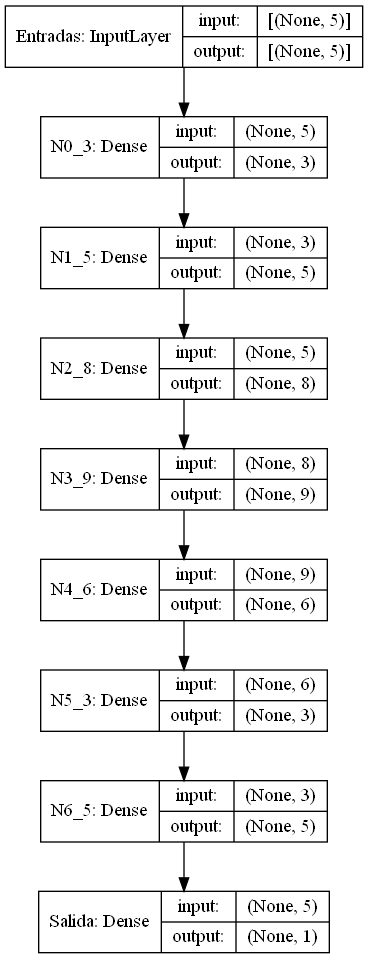

In [4]:
mostrarModelo(modelo,show_shapes=True)

In [ ]:
#Entrenamiento
EPOCHS = 1000
earlyStop = True
## Early Stop
if earlyStop:
    early_stop = keras.callbacks.EarlyStopping(monitor='val_loss', patience=10)

    ## Metodo entrenar
    history = model.fit(
      normed_train_data, train_labels,
      epochs=EPOCHS, validation_split = 0.2, verbose=0,
      callbacks=[early_stop,tfdocs.modeling.EpochDots()])
else:
    ## Metodo entrenar
    history = model.fit(
      normed_train_data, train_labels,
      epochs=EPOCHS, validation_split = 0.2, verbose=1,
      callbacks=[tfdocs.modeling.EpochDots()])

In [ ]:
#Estadisticos de validacion
hist = pd.DataFrame(history.history)
hist['epoch'] = history.epoch
plotter = tfdocs.plots.HistoryPlotter(smoothing_std=2)
plotter.plot({'Basic': history}, metric = "mse")
plt.ylabel('MSE')
hist.tail()

In [ ]:
model.evaluate(normed_test_data, test_labels, batch_size=128)